# Рубежный контроль №1,
Турусов Владислав, ИУ5-64, Вариант №15, Задание №2, Набор данных №7

# Задание
Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

# Дополнительное задание
Для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)"

# Решение

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns


#регулируем настройки экрана для отчета
pd.set_option("display.width", 150)
pd.set_option('display.max_columns', None)

#загружаем данные
data = pd.read_csv('data.csv')
data.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,69618,Fancy Wheatfield Bakery,1362 Stockton St,San Francisco,CA,94133,NaN,NaN,NaN,NaN,69618_20190304,2019-03-04T00:00:00.000,NaN,Complaint,69618_20190304_103130,Inadequate sewage or wastewater disposal,Moderate Risk
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,97975_20190725,2019-07-25T00:00:00.000,96.0,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk
2,69487,Hakkasan San Francisco,1 Kearny St,San Francisco,CA,94108,NaN,NaN,NaN,NaN,69487_20180418,2018-04-18T00:00:00.000,88.0,Routine - Unscheduled,69487_20180418_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
3,91044,Chopsticks Restaurant,4615 Mission St,San Francisco,CA,94112,NaN,NaN,NaN,NaN,91044_20170818,2017-08-18T00:00:00.000,NaN,Non-inspection site visit,NaN,NaN,NaN
4,85987,Tselogs,552 Jones St,San Francisco,CA,94102,NaN,NaN,NaN,NaN,85987_20180412,2018-04-12T00:00:00.000,94.0,Routine - Unscheduled,85987_20180412_103132,Improper thawing methods,Moderate Risk


In [4]:
data.dtypes

business_id                int64
business_name             object
business_address          object
business_city             object
business_state            object
business_postal_code      object
business_latitude        float64
business_longitude       float64
business_location         object
business_phone_number    float64
inspection_id             object
inspection_date           object
inspection_score         float64
inspection_type           object
violation_id              object
violation_description     object
risk_category             object
dtype: object

In [5]:
data.shape

(53973, 17)

Проверим наличие пропусков

In [6]:
data.isnull().sum()

business_id                  0
business_name                0
business_address             0
business_city                0
business_state               0
business_postal_code      1083
business_latitude        24095
business_longitude       24095
business_location        24095
business_phone_number    36539
inspection_id                0
inspection_date              0
inspection_score         14114
inspection_type              0
violation_id             13462
violation_description    13462
risk_category            13462
dtype: int64

Выполним замену для количественного признака inspection_score.

In [7]:
data['inspection_score'].isna().sum()

14114

Получим среднее

In [10]:
mean = data['inspection_score'].mean()
mean

86.23525427130636

Выполним замену и проверим количество пустых значений:

In [11]:
data['inspection_score'].fillna(mean, inplace=True)
data['inspection_score'].isna().sum()

0

Выполним удаление для категориального признака risk_category


Проверим число пропусков

In [12]:
data['risk_category'].isna().sum()

13462

Удалим строки, содержащие нулевое значение колонки risk_category

In [13]:
data = data[~data['risk_category'].isna()]

Проверим количество пустых значений поля risk_category:

In [14]:
data['risk_category'].isna().sum()

0

# Дополнительное задание
Построим график "Скрипичная диаграмма" (Violin plot) для поля inspectional_score

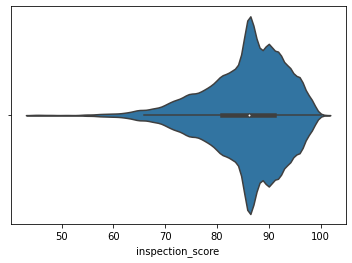

In [15]:
sns.violinplot(x=data['inspection_score'])